In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(6497, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65  

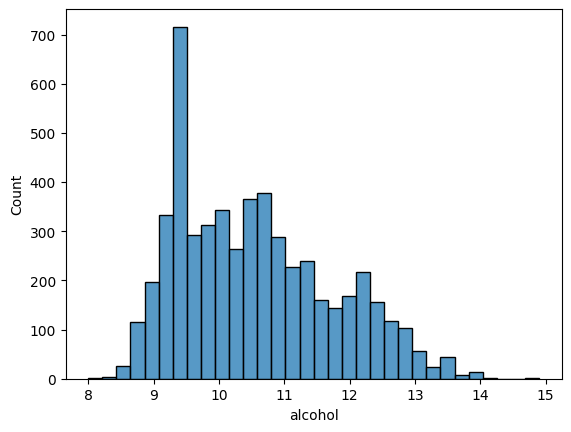

LinearRegression()

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
red_path = "/content/drive/MyDrive/AIML dataset/winequality-red.csv"
white_path = "/content/drive/MyDrive/AIML dataset/winequality-white.csv"

df_red = pd.read_csv(red_path, sep=';')
df_white = pd.read_csv(white_path, sep=';')

df = pd.concat([df_red, df_white], ignore_index=True)

print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

print(df.isnull().sum())
print(df.isnull().sum().sum())

df = df.fillna(df.mean(numeric_only=True))

print(df.isnull().sum())

print(df.duplicated().sum())

df = df.drop_duplicates()

print(df.duplicated().sum())

print(df.describe())

df.to_csv("/content/drive/MyDrive/AIML dataset/wine_quality_cleaned.csv", index=False)

print("Done")
sns.histplot(data=df,x='alcohol')
plt.show()


X=df.drop('quality',axis=1)
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)


In [ ]:
import numpy as np
import pandas as pd

red_path = "/content/drive/MyDrive/AIML dataset/winequality-red.csv"
white_path = "/content/drive/MyDrive/AIML dataset/winequality-white.csv"

df_red = pd.read_csv(red_path, sep=';')
df_white = pd.read_csv(white_path, sep=';')

df = pd.concat([df_red, df_white], ignore_index=True)

print("Original shape:", df.shape)

df = df.fillna(df.mean(numeric_only=True))

df = df.drop_duplicates()

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

for col in numeric_cols:
    df = df[df[col] >= 0]

print("Cleaned shape:", df.shape)

df.to_csv("/content/drive/MyDrive/AIML dataset/wine_quality_cleaned.csv", index=False)

print("Cleaned dataset saved successfully")


Original shape: (6497, 12)
Cleaned shape: (3669, 12)
Cleaned dataset saved successfully
